In [1]:
import os
import pandas as pd
import pycaret.classification as clf

import utils as my

## Monitoring & Check `history.csv`

### Training results

In [12]:
df_history = pd.read_csv("./models/history.csv")
# df_history = df_history.loc[df_history["LogLoss"] < 0.1, :]
my.show_history(df_history, mode="Train", sort_by=['Prec.', 'AUC'])

,5,9,17,13,3,1,7,11,15
Model,base-001,base-001,base-001,base-001,base-001,base-001,base-001,base-001,base-001
Accuracy,0.951400,0.913200,0.942700,0.904500,0.847200,0.847200,0.845500,0.875000,0.833300
AUC,0.993400,0.973200,0.990200,0.969900,0.933300,0.933200,0.935000,0.951100,0.909900
Recall,0.890500,0.801000,0.940300,0.885600,0.686600,0.686600,0.681600,0.860700,0.796000
Prec.,0.967600,0.941500,0.900000,0.847600,0.846600,0.846600,0.845700,0.797200,0.744200
F1,0.927500,0.865600,0.919700,0.866200,0.758200,0.758200,0.754800,0.827800,0.769200
LogLoss,0.261400,0.314700,0.264000,0.313800,0.367600,0.367600,0.365700,0.341300,0.383800
Tact,0:00:27,0:00:29,0:00:28,0:00:30,0:00:26,0:00:26,0:00:27,0:00:27,0:00:26
imputation_type,simple,simple,simple,simple,simple,simple,simple,simple,simple
fix_imbalance,False,False,True,True,False,False,False,True,True


### Test restuls

In [13]:
df_history = pd.read_csv("./models/history.csv")
# df_history = df_history.loc[(df_history["LogLoss"] < 0.4) & (df_history["AUC"] > 0.8), :]
my.show_history(df_history, mode="Test", sort_by=['Prec.', 'AUC'])

,3,1,7,9,5,13,17,15,11
Model,base-001,base-001,base-001,base-001,base-001,base-001,base-001,base-001,base-001
Accuracy,0.781200,0.776000,0.776000,0.765600,0.765600,0.755200,0.734400,0.724000,0.724000
AUC,0.842400,0.841400,0.836400,0.827000,0.826600,0.830000,0.804400,0.821000,0.831400
Recall,0.641800,0.641800,0.641800,0.641800,0.641800,0.761200,0.731300,0.701500,0.716400
Prec.,0.704900,0.693500,0.693500,0.671900,0.671900,0.622000,0.597600,0.587500,0.585400
F1,0.671900,0.666700,0.666700,0.656500,0.656500,0.684600,0.657700,0.639500,0.644300
LogLoss,0.467800,0.469000,0.471300,0.486300,0.486300,0.503300,0.523500,0.500900,0.490300
Tact,0:00:26,0:00:26,0:00:27,0:00:29,0:00:27,0:00:30,0:00:28,0:00:26,0:00:27
imputation_type,simple,simple,simple,simple,simple,simple,simple,simple,simple
fix_imbalance,False,False,False,False,False,True,True,True,True


## Metrics

In [4]:
dataset = pd.read_csv("./pima_diabetes.csv")
target_name = "Outcome"
train_size = 0.75
seed = 111

train, test = my.get_data(dataset, train_size, seed, target_name=target_name)

Train Data: (576, 9)
Test  Data: (192, 9) 



### Default model (all default parameters)

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._bagging.BaggingClassifier'>
>> Train scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0          0.8264  0.9095  0.6915  0.7853  0.7354   0.3786     


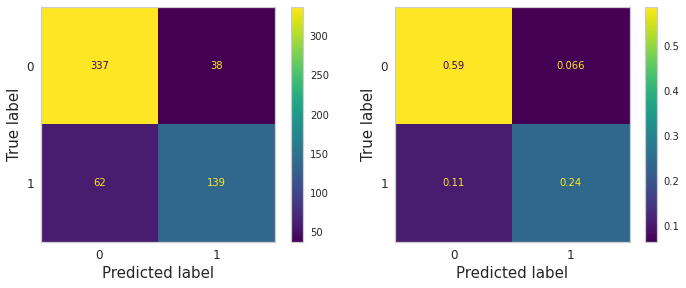

>> Test scores:
   Model  Accuracy    AUC  Recall   Prec.      F1  LogLoss Tact
0          0.7396  0.826  0.6119  0.6308  0.6212   0.4791     


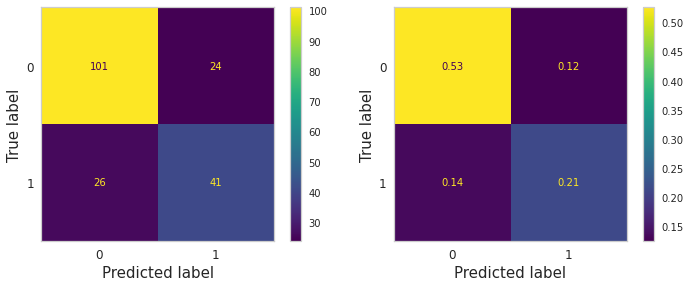

In [5]:
## Default model
model_name = "ensemble__train__Accuracy-0.8264_AUC-0.9095__test__Accuracy-0.7396_AUC-0.8260__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

### Baseline model

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
>> Train scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0           0.941  0.9899  0.9254  0.9073  0.9163   0.2692     


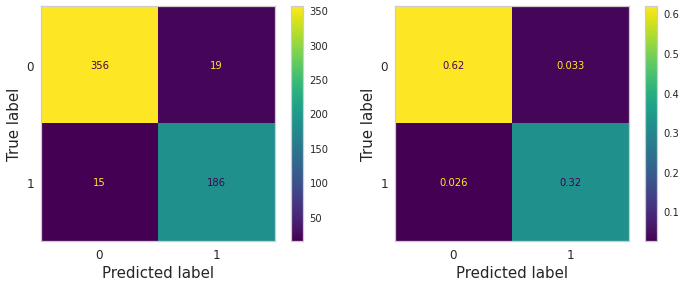

>> Test scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0          0.6927  0.7926  0.7015  0.5465  0.6144   0.5366     


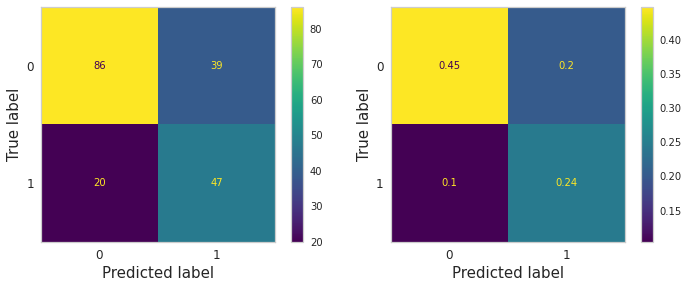

In [6]:
model_name = "ensemble__train__Accuracy-0.9410_AUC-0.9899__test__Accuracy-0.6927_AUC-0.7926__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

### Tuned models

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._forest.RandomForestClassifier'>
>> Train scores:
   Model  Accuracy  AUC  Recall  Prec.   F1  LogLoss Tact
0             1.0  1.0     1.0    1.0  1.0   0.1274     


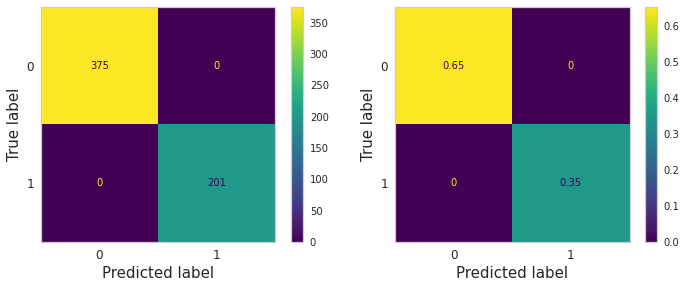

>> Test scores:
   Model  Accuracy     AUC  Recall   Prec.      F1  LogLoss Tact
0           0.724  0.8181  0.6866  0.5897  0.6345   0.4908     


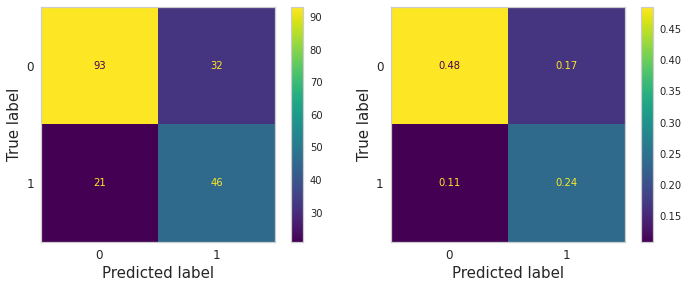

In [8]:
## Baseline model
model_name = "base__train__Accuracy-1.0000_AUC-1.0000__test__Accuracy-0.7240_AUC-0.8181__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])